In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=1000)
tf.enable_eager_execution()
print(tf.__version__)


1.15.0


In [3]:
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
X, y = mnist.train.next_batch(1)
X

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        

In [5]:
X.shape

(1, 784)

In [6]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [8]:
X.reshape((28, 28))

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

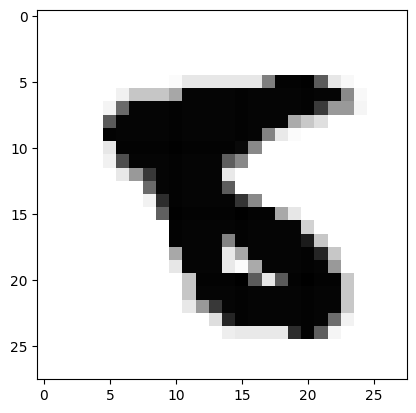

In [9]:
plt.imshow(X.reshape(28, 28), cmap='Greys')
plt.show()

In [14]:
X = X.reshape(1, 28, 28, 1)
X.shape

(1, 28, 28, 1)

In [17]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [18]:
initializer = tf.contrib.layers.xavier_initializer()

In [19]:
w1 = tf.Variable(initializer([3, 3, 1, 32]))
w1

<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.06332897, -0.06592332, -0.13702676,  0.1022314 , -0.09540287,  0.05122319, -0.05831876,  0.13491811,  0.03524625, -0.13489023, -0.14017841,  0.02655368,  0.00990707, -0.01352184, -0.11380956,  0.08139168,  0.00619759, -0.12030675,  0.04456016, -0.0466868 ,  0.03410585,  0.09811127, -0.07652707, -0.11621122,  0.05564919,  0.12483032,  0.02651881, -0.05801489,  0.033196  , -0.13099325,  0.10432236, -0.09960866]],

        [[-0.08051019, -0.0614695 ,  0.02155964,  0.05457699,  0.06755313,  0.0329897 ,  0.06459638, -0.06602203, -0.00923721, -0.00394316,  0.11376409, -0.06814091,  0.07674199,  0.06173667,  0.1415285 ,  0.06195199, -0.10493751, -0.04198039, -0.12427685, -0.08544175,  0.01754819,  0.01895976,  0.12081443,  0.0438493 ,  0.09447835,  0.12788333,  0.09060068, -0.10771088,  0.11582096,  0.03136405, -0.05513437, -0.0047853 ]],

        [[-0.06402919,  0.03508943, -0.04439008, -0.06072409, -0.04508121,

In [25]:
tf.reshape(w1[ : , : , : , 0], (3, 3))

<tf.Tensor: id=24, shape=(3, 3), dtype=float32, numpy=
array([[ 0.06332897, -0.08051019, -0.06402919],
       [-0.0836347 ,  0.08055577,  0.08577113],
       [ 0.09397916, -0.06386422, -0.03072162]], dtype=float32)>

In [21]:
img = X

In [22]:
img

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [27]:
convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding='SAME')

In [30]:
convolution_h1[0, : , : , 0]

<tf.Tensor: id=34, shape=(28, 28), dtype=float32, numpy=
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000

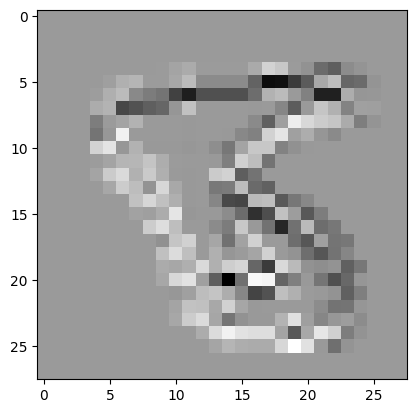

In [34]:
plt.imshow(convolution_h1[0, : , : , 0], cmap='Greys')
plt.show()

In [38]:
convolution_h = tf.nn.relu(convolution_h1)

In [39]:
convolution_h1[0, : , : , 0]

<tf.Tensor: id=62, shape=(28, 28), dtype=float32, numpy=
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000

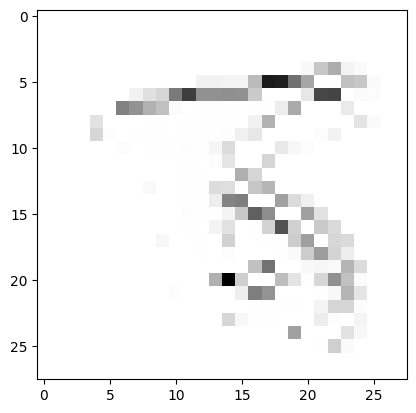

In [40]:
plt.imshow(convolution_h[0, : , : , 0], cmap='Greys')
plt.show()

In [ ]:
# first season
# martial 170 ronaldo 196
# sancho 177 rashford 173
# antony 165 garnacho -8.5 elanga -8
# bruno 174 eriksen 170
# van de beek 160 mctominay 148 fred 149
# casemiro 170 lisandro 153
# shaw 162 malracia 150
# lindelof 149 maguire 158
# varane 172 tuiangjev 148
# dalot 158 bissaka 150
# de gea 175 
# 
# final season > 
# vlahovic 169 leao 176 / gakpo 162
# sancho 177 rashford 173
# antony 165 endrick -10 / garnacho -8.5 elanga -8
# bruno 174 kang in -8.5
# de jong 183 bellingham -9.5
# casemiro 170 camavinga -10 / moriba -9.5
# shaw 162 alphonso 176
# de ligt 176 gvardiol -9
# varane 172 min jae 159
# dalot 158 livramento -9
# handerson 160 van devoordt -8 denis seimen -8.5 >